<div>
<img src="https://www.nebrija.com/images/logos/logotipo-universidad-nebrija.jpg" width="200">
</div>

**ALGORITMOS** -
Prof: Carmen Pellicer Lostao

# Transformada de Fourier

En este notebook realizaremos diferentes practicas para entender el algoritmo de la Transformada de Fourier. Comenzando por su realizacion y significado clásico implementando el algoritmo de la **FFT** o **Fast Fourier Transform** para encontrar el espectro de señales discretas de valores reales y pasando posteriormente a implementar la **QFT** o **Quantum Fourier Transform** y su inversa para realizar conversiones entre señales de valores complejos y su descomposicion de Fourier.

Cargamos inicialmente las librerías de ejecucion que vamos a necesitar

In [16]:
import numpy as np
import math

# Import Qiskit
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer, transpile
from qiskit.providers.aer import Aer, AerSimulator
from qiskit.providers.fake_provider import FakeVigo

from qiskit.visualization import array_to_latex
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

## Algoritmo de la Transformada de Fourier discreta (FFT)

La transformada de Fourier es una transformacion matemática que permite obtener el espectro de frecuencias de una señal o dicho de otra forma su periodicidad.

Su calculo es utilizado ampliamente en ciencia y en ingenieria para analisis de datos y señales. Para su calculo se utiliza el algoritmo **FFT** o **Fast Fourier Transform** que es un algoritmo numerico que permite calcular de forma muy eficiente el espectro de frecuencias de una señal muestreada. 

El algoritmo de implementacion de la **FFT** puede utilizarse directamente de las librerías de `numpy` con la operacion [Discrete Fourier Transform](https://numpy.org/doc/stable/reference/routines.fft.html)

#### EJERCICIO

Descarga el fichero de [datos](https://drive.google.com/file/d/1GDKsBk3yUBcPhhKOO53TtjEGd_6YdLPx/view) que recoge el muestreo de una [señal sonora](https://drive.google.com/file/d/1mbsQQKtk7xsh0UWywvC7JlHsuMObS9WR/view) y guardalo en el directorio de trabajo.

Crea un programa Python que realice los siguientes pasos:

1) lee el archivo csv desde una URL "waveform.csv" que tiene el siguiente formato: número1, número2. Donde número1 son datos de tiempo y número2 son datos de señal

2) calcula la FFT Transformada Rápida de Fourier de los datos en el archivo

3) visualiza los datos obtenidos de la FFT con el analisis espectral de la señal

4) calcula la frecuencia con el máximo en la FFT

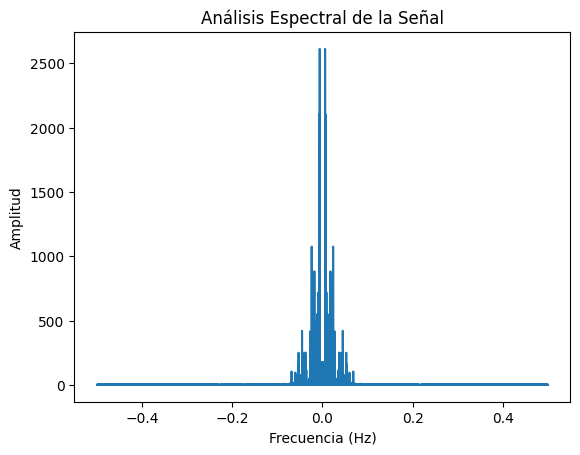

Frecuencia con el máximo en la FFT: 0.005918367346938775 Hz


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

# Paso 1: Leer el archivo CSV desde una URL "waveform.csv"
url_csv = 'waveform.csv'
datos = pd.read_csv(url_csv, header=None, names=['tiempo', 'senal'])

# Paso 2: Calcular la FFT (Transformada Rápida de Fourier)
senal = datos['senal'].values
fft_resultado = fft(senal)

# Paso 3: Visualizar los datos obtenidos de la FFT con el análisis espectral de la señal
frecuencias = np.fft.fftfreq(len(senal))
plt.plot(frecuencias, np.abs(fft_resultado))
plt.title('Análisis Espectral de la Señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Paso 4: Calcular la frecuencia con el máximo en la FFT
frecuencia_maxima = np.abs(frecuencias[np.argmax(np.abs(fft_resultado))])
print(f'Frecuencia con el máximo en la FFT: {frecuencia_maxima} Hz')

## Algoritmo de la Transformada de Fourier Cuantica (QFT)

## Introduccion

La QFT es la implementacion cuantica de la transformada discreta de Fourier (DFT) en computacion clásica, donde se usa principalmente en la teoria de señales para encontrar el espectro o la descomposicion en frecuencias de una señal.

En computacion clásica la DFT se define como una transformacion que actua sobre un vector $(a_0, ..., a_{N-1})$ y lo transforma en otro vector $(\phi_0, ..., \phi_{N-1})$ por medio de los siguientes calculos:


$$\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}a_j\omega_N^{jk}$$


donde $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Notese que los valores de $(a_0, ..., a_{N-1})$ son tipicamente una sucesion de valores reales y la DFT obtiene unos valores transformados $(\phi_0, ..., \phi_{N-1})$ que son números complejos.


En computacion cuántica la QFT se define como una transformacion de un estado cuántico $\vert \psi \rangle = \sum_{j=0}^{N-1} a_j \vert j \rangle$ que se transforma en otro estado cuántico $\vert \phi\rangle = \sum_{k=0}^{N-1} \phi_k \vert k \rangle$ por medio de los siguientes calculos:


$$\phi_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}a_j\omega_N^{jk}$$


con $\omega_N^{jk}$ definida como anteriormente. 


Y esto podemos expresarlo como sigue para un estado de la base:

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$


Notese que se trata de una transformacion que afecta solo a las amplitudes, introduciendo fases.

Expresando la QFT en la forma de composicion de qubits unitarios tenemos que:

$$
QFT(\vert j_{n-1}...j_1j_0\rangle)= \frac{1}{\sqrt{N}} 
(\vert 0 \rangle + e^{2 \pi i \frac{j_0}{2}} \vert 1 \rangle )\otimes
(\vert 0 \rangle + e^{2 \pi i (\frac{j_1}{2}+\frac{j_0}{2^2})} \vert 1 \rangle)\otimes ... \otimes 
(\vert 0 \rangle + e^{2 \pi i (\frac{j_{n-1}}{2}+...+\frac{j_1}{2^{n-1}}+\frac{j_0}{2^n})} \vert 1 \rangle)$$




La formula anterior demuestra la QFT para estados de $n$ qbits con $N=2^n$. 

Notese que el ultimo qubit depende de los valores de todos los qubits anteriores y cada bit sucesivo depende de menos qbits. Esto tiene implicaciones importantes a la hora de ejecutar el circuito en HW cuántico dado que la conexion entre los qubits es limitada.

## Intuicion 

La QFT transforma un estado cuantico en base Z a otra base, que es la base X, o sea es como un cambio de base de coordenadas de los vectores de estado:

$$
|\text{Estado en la base Z }\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{Estado en la base de Fourier}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$

Los estados en la base de Fourier se denotan con (~)

## QFT para 4 qubits

La QFT para 4 qubits seria la siguiente expresada en la forma de composicion de qubits unitarios tenemos que:

$$
QFT(\vert j_{n-1}j_1...j_0\rangle)= \frac{1}{\sqrt{N}} 
(\vert 0 \rangle + e^{2 \pi i \frac{j_0}{2}} \vert 1 \rangle )\otimes
(\vert 0 \rangle + e^{2 \pi i (\frac{j_0}{2^2}+\frac{j_1}{2})} \vert 1 \rangle)\otimes 
(\vert 0 \rangle + e^{2 \pi i  (\frac{j_0}{2^3}+\frac{j_1}{2^{2}}+\frac{j_{2}}{2})}] \vert 1 \rangle)\otimes 
(\vert 0 \rangle + e^{2 \pi i  (\frac{j_0}{2^4}+\frac{j_1}{2^{3}}+\frac{j_{2}}{2^2}+\frac{j_{3}}{2})}] \vert 1 \rangle)$$

### EJERCICIO 1

Implementar la QFT para 4 qbits

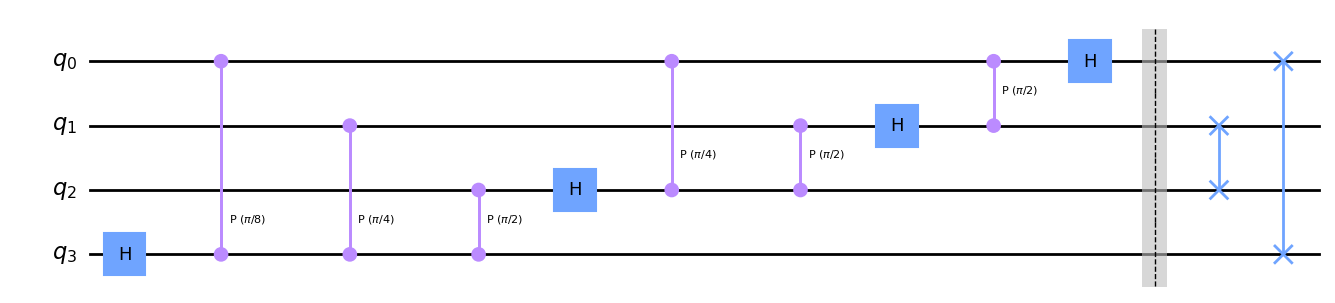

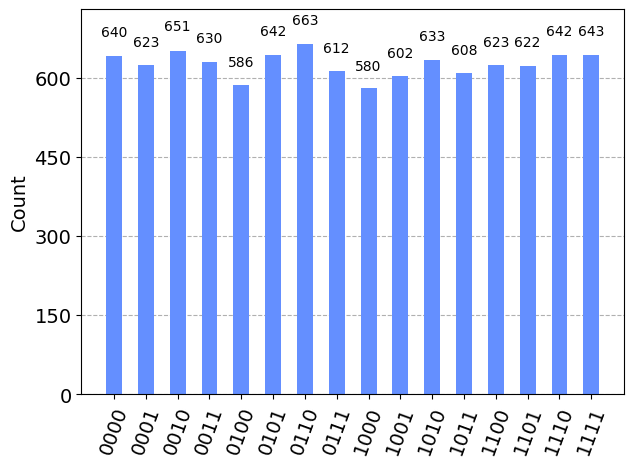

In [24]:
n = 4
circuito = QuantumCircuit(n)

for ind in range(n):
    circuito.h(n-1-ind)
    for j in range(n-1-ind):
        circuito.cp(np.pi/(2**(n-1-ind))*2**j,j,n-1-ind)

circuito.barrier()
circuito.swap(1,2)
circuito.swap(0,n-1)

display(circuito.draw("mpl"))

circuito.measure_all()

simulador = Aer.get_backend("aer_simulator")
tcirc = transpile(circuito,simulador)
job = simulador.run(tcirc,shots = 10000).result()

display(plot_histogram(job.get_counts()))

#### EJERCICIO

Calcula la QFT para un numero de bits generico n, de forma iterativa con un bucle `FOR`para poner las puertas que corresponden a cada qubit y los `SWAP`s

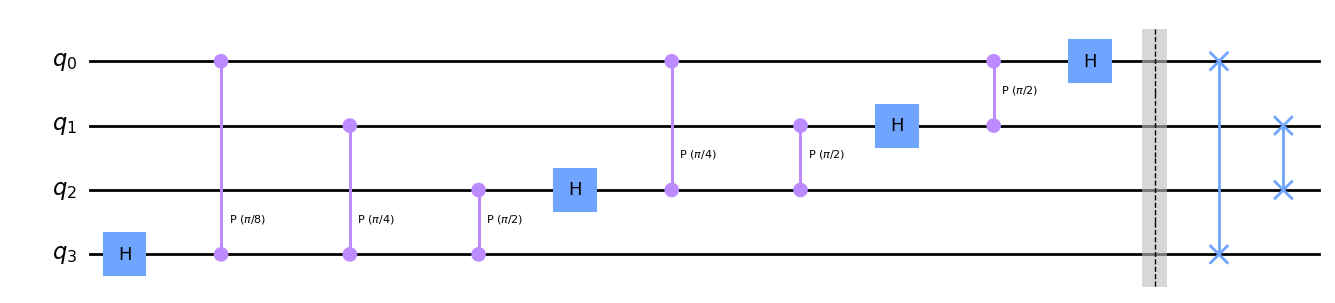

In [23]:
n = 4
circuito = QuantumCircuit(n)

for ind in range(n):
    circuito.h(n-1-ind)
    for j in range(n-1-ind):
        circuito.cp(np.pi/(2**(n-1-ind))*2**j,j,n-1-ind)

circuito.barrier()

if n%2==0:
    for ind in range(int(n/2)):
        circuito.swap(ind,n-1-ind)
else:
    for ind in range(int((n-1)/2)):
        circuito.swap(ind,n-1-ind)

circuito.draw("mpl")

## Circuito general de la QFT 

En general el circuito que implementa la QFT para cualquier numero de qbits podemos verlo en el siguiente codigo, donde se emplea recursibidad para generar de forma más eficiente los conjuntos de puertas para cada qbit

In [31]:
def qft_rotations(circuit, n):
    """Circuito de qft para los primeros n qubits (sin swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit), qubit, n)
    # Al final de la funcion se le llama de nuevo de forma recursiva
    # para seguir haciendo las rotaciones en el resto de los qbits
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    """Funcion que hace los Swaps de la QFT en el registro cuantico"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """Circuito QFT para los primeros n qbits de un circuito"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

## Creando estados cuanticos periódicos

Creamos 3 circuitos de 4 qbits que generan 3 estados cuanticos con diferente periodicidad en la fase del registro cuantico

In [33]:
def crear_señal(which_signal):
    #creamos un registro cuántico donde almacenaremos una señal periódica A, B o C
    #codificamos esa periodicidad en la fase de los qbits del registro
    signal = QuantumRegister(4, name='signal')
    qc = QuantumCircuit(signal)

    ## preparamos las señales
    qc.h(signal);
    if which_signal == 'A':
        qc.rz(math.radians(180), signal[0]);
    elif which_signal == 'B':
        qc.rz(math.radians(-90), signal[0])
        qc.rz(math.radians(180), signal[1])
    elif which_signal == 'C':
        qc.rz(math.radians(-45), signal[0])
        qc.rz(math.radians(-90), signal[1])
        qc.rz(math.radians(180), signal[2])

    qc.barrier()
    return qc

In [39]:
#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
qc=crear_señal('A')
qc.draw()

backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
display(array_to_latex(outputstate))
        
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

<IPython.core.display.Latex object>

|0> -0.25j probabilidad = 6.25%
|1> 0.25j probabilidad = 6.25%
|2> -0.25j probabilidad = 6.25%
|3> 0.25j probabilidad = 6.25%
|4> -0.25j probabilidad = 6.25%
|5> 0.25j probabilidad = 6.25%
|6> -0.25j probabilidad = 6.25%
|7> 0.25j probabilidad = 6.25%
|8> -0.25j probabilidad = 6.25%
|9> 0.25j probabilidad = 6.25%
|10> -0.25j probabilidad = 6.25%
|11> 0.25j probabilidad = 6.25%
|12> -0.25j probabilidad = 6.25%
|13> 0.25j probabilidad = 6.25%
|14> -0.25j probabilidad = 6.25%
|15> 0.25j probabilidad = 6.25%


## Utilizacion de la QFT para calcular la frecuencia de repeticion de un estado cuantico

### EJERCICIO

Utiliza la QFT y calcula el periodo de los tres estados cuanticos que hemos creado en el apartado anterior

In [49]:
#De un estado con un patron de frecuencias, obtenemos la frecuencia de repeticion de ese patron

qc=crear_señal('C')
#display(qc.draw("mpl"))

#calcular la qft
qc = qft(qc,4)

#simular resultados
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc)
result = job.result()

#obtener vector de estados resultado
outputstate = result.get_statevector(qc, decimals=3)
display(array_to_latex(outputstate))

#imprimir amplitudes de los estados resultado
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probabilidad = {}%'.format(i, amp, round(prob * 100, 5)))

<IPython.core.display.Latex object>

|2> (0.924-0.383j) probabilidad = 100.0465%


## La QFT inversa

La transformacion inversa de la transformada de Fourier nos permite construir un estado con un determinado patron de periodicidades o frecuencias de repeticion en sus amplitudes.

Podemos implementarla de una forma sencilla con el metodo ```.inverse()``` de la clase ```QuantumCircuit```

In [50]:
def inverse_qft(circuit, n):
    """Funcion que implementa la QFT inversa para los n primeros bits de un circuito cuantico"""
    # Creamos el circuito de n bits
    qft_circ = qft(QuantumCircuit(n), n)
    # Calculamos el circuito incerso
    invqft_circ = qft_circ.inverse()
    # lo añadimos al circuito creado
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit 

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


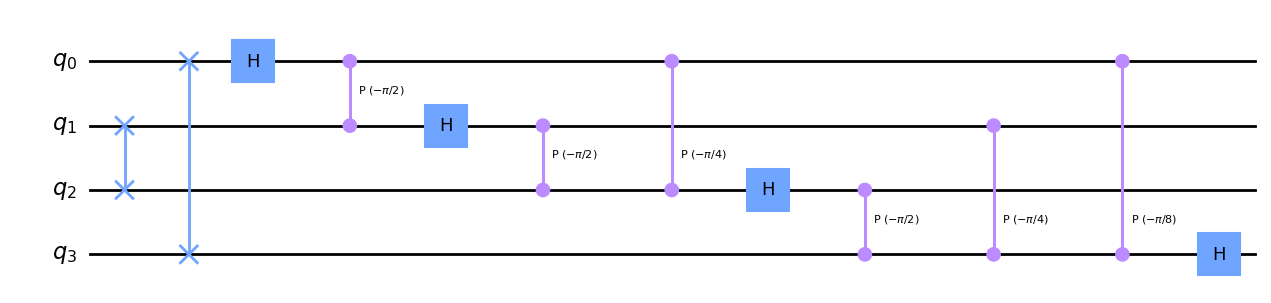

In [55]:
qc = QuantumCircuit(4)
inverse_qft(qc,4)
qc.decompose().draw("mpl",fold=-1)   # .decompose() para verlo con puertas individuales

/home/codespace/.python/current/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


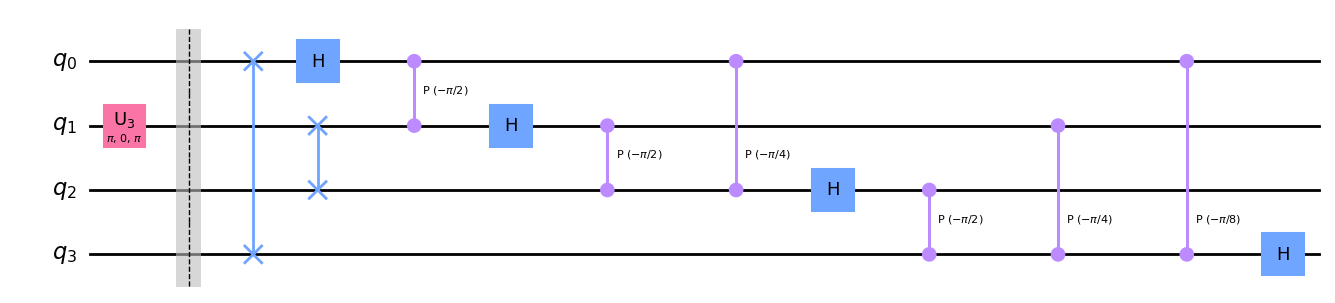

|0> (0.25-0j) probability = 6.25%
|1> (0.177-0.177j) probability = 6.2658%
|2> (-0-0.25j) probability = 6.25%
|3> (-0.177-0.177j) probability = 6.2658%
|4> (-0.25+0j) probability = 6.25%
|5> (-0.177+0.177j) probability = 6.2658%
|6> 0.25j probability = 6.25%
|7> (0.177+0.177j) probability = 6.2658%
|8> (0.25-0j) probability = 6.25%
|9> (0.177-0.177j) probability = 6.2658%
|10> (-0-0.25j) probability = 6.25%
|11> (-0.177-0.177j) probability = 6.2658%
|12> (-0.25+0j) probability = 6.25%
|13> (-0.177+0.177j) probability = 6.2658%
|14> 0.25j probability = 6.25%
|15> (0.177+0.177j) probability = 6.2658%


In [57]:
#De una frecuencia obtener un estado con esa frecuencia

#Preparamos el circuito
qc = QuantumCircuit(4)

#Ppreparamos la frecuencia |2> = |0010>  con la notacion |q3q2q1q0>
qc.x(1)
qc.barrier()

inverse_qft(qc,4)
display(qc.decompose().draw("mpl",fold=-1))

backend = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend)  #opcional

job = backend.run(qc)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))


### EJERCICIO

Calcula la qft de la qft inversa del ejercicio anterior y verifica que la frecuencia resultante coincide con la inicial

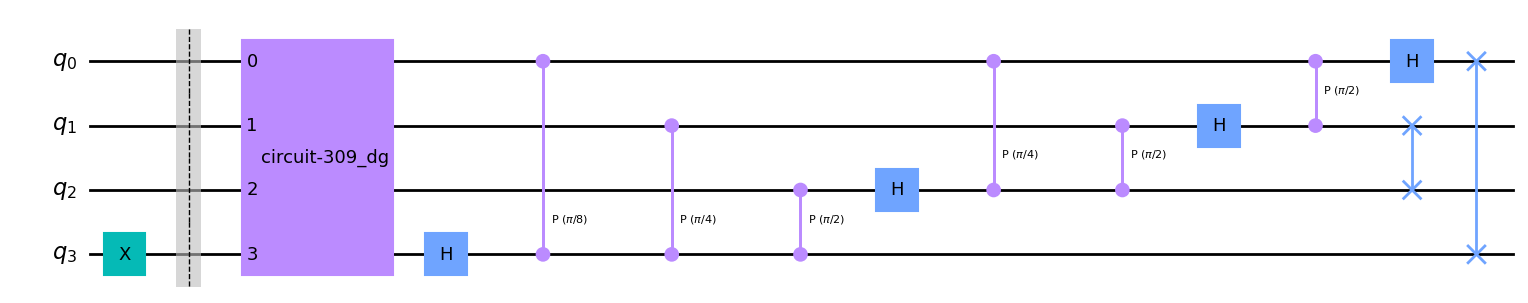

|8> (1-0j) probability = 100.0%


In [68]:
#De una frecuencia obtener un estado con esa frecuencia

#Preparamos el circuito
qc = QuantumCircuit(4)

#Preparamos la frecuencia |2> = |0010>  con la notacion |q3q2q1q0>
qc.x(3)
qc.barrier()

####CALCULAMOS LA QFT INVERSA
inverse_qft(qc,4)

####CALCULAMOS LA QFT DEL CIRCUITO
qft(qc,4)

display(qc.draw("mpl",fold=-1))

###EJECUCION EN SIMULADOR
backend = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend)  #opcional
job = backend.run(qc)
result = job.result()


#visualizamos el output_state
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        prob = abs(amp) * abs(amp)
        print('|{}> {} probability = {}%'.format(i, amp, round(prob * 100, 5)))

## Ejecucion en un Simulador con ruido

### EJERCICIO

Crear una señal, calcular su QFT y la ejecutarla en un simulador con y sin ruido

In [ ]:
##crear el circuito con una señal y calcular su QFT
#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
s='C' #señal
n= 4 #qubits


##SIN RUIDO
##crea el simulador
ç
# Transpilamos el circuito para mapearlo a las puertas ruidosas

# Ejecutamos el circuito y obtenemos el resultado



##CON RUIDO
# Tomamos un backend ruidoso ficticio de fake providers y creamos el simulador

# Transpilamos el circuito para mapearlo a las puertas ruidosas

# Ejecutamos el circuito y obtenemos el resultado


##RESULTADOS


## Ejecucion en HW cuantico real

### EJERCICIO

Crear una señal, calcular su QFT y la ejecutarla en un dispositivo cuantico real

In [ ]:
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ
provider = IBMQ.load_account()

##busca el backend cuantico con menos carga de trabajo actualmente


In [ ]:
#Probar con señal A (se repite 8 veces, señal B se repite 4, señal C se repite 2 veces
s='C' #señal
n= 4 #qubits


In [ ]:
#ejecutar e ljob


Una vez ejecutado el job recuperamos los resultados de la ejecucion y visualizamos los resultados